In [1]:
import pandas as pd
import pickle
import numpy as np

# Load the bar review dataset 
review = pd.read_pickle('../output/bar_reviews_cleaned_and_tokenized.pickle')


In [2]:
from itertools import chain
from collections import OrderedDict
reviews_merged = OrderedDict()

# Flatten the reviews, so each review is just a single list of words.
n_reviews = -1

for bus_id in set(review.business_id.values[:n_reviews]):
    # This horrible line first collapses each review of a corresponding business into a list
    # of lists, and then collapses the list of sentences to a long list of words
    reviews_merged[bus_id] = " ".join(list(chain.from_iterable( 
                                    chain.from_iterable( review.cleaned_tokenized[review.business_id==bus_id] )))
                                     )
    
docs = reviews_merged.values()





In [3]:
from __future__ import print_function
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation


n_samples = -1
n_features = 5000
n_top_words = 10

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.75, min_df=2, max_features=n_features)
t0 = time()
tf = tf_vectorizer.fit_transform(docs[:n_samples])
print("done in %0.3fs." % (time() - t0))


Extracting tf features for LDA...
done in 12.601s.


# Choosing N-Topics

In [ ]:
perplexity = [] 
for n_topics in range(1,30):
    print("N Topics %i"%n_topics)
    print("Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
          % (n_samples, n_features))
    lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                    learning_method='online', learning_offset=10.,
                                    random_state=0, n_jobs=6)
    t0 = time()
    doc_topics = lda.fit(tf)
    print("done in %0.3fs." % (time() - t0))
    
    perplexity.append(lda.perplexity(tf))
    


N Topics 1
Fitting LDA models with tf features, n_samples=-1 and n_features=5000...
done in 2.905s.
N Topics 2
Fitting LDA models with tf features, n_samples=-1 and n_features=5000...
done in 10.775s.
N Topics 3
Fitting LDA models with tf features, n_samples=-1 and n_features=5000...


In [13]:
# Save the model 
with open('../output/LDA_perplexity.pickle', 'wb') as f: 
    pickle.dump(perplexity, f, )


# Choosing Number of topics via elbow

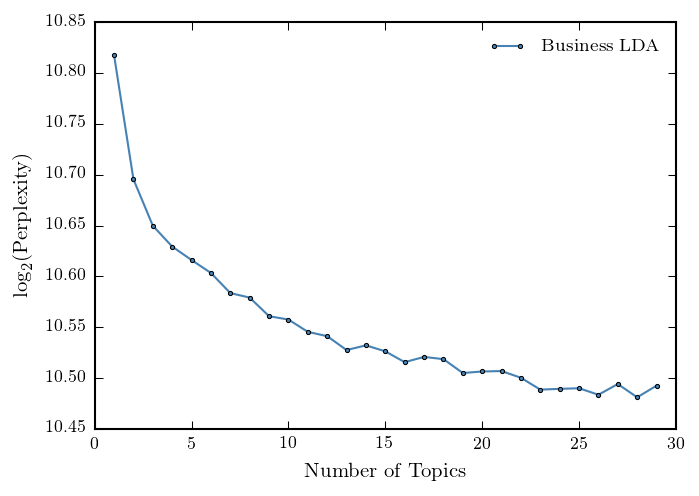

In [10]:
import pickle
perplexity = pickle.load( open('../output/LDA_perplexity.pickle', 'rb' ))

plt.plot(range(1,30), np.log2(perplexity), marker='o', markersize=2, label='Business LDA')
plt.xlabel('Number of Topics')
plt.ylabel('$\log_2$(Perplexity)')
plt.legend(frameon=False)
plt.savefig('../images/LDA_num_topics_elbow.png')

In [28]:

# This is a vector for each company in topic space
doc_topic_distr = lda.transform(tf)


In [50]:

print(doc_topic_distr.shape)
doc_topics = {'topics': reviews_merged.keys(), 'doc_topic_dist':doc_topic_distr,}
import cPickle as pickle

with open('../output/LDA_doc_topic_list.pickle', 'wb') as f: 
    pickle.dump(doc_topics, f, )


(4602, 20)


In [10]:
# Plot the sum of topics.
plt.bar(np.arange(len(np.sum(doc_topic_distr, axis=0))), np.average(doc_topic_distr, axis=0), color='steelblue')

NameError: name 'doc_topic_distr' is not defined